<a href="https://colab.research.google.com/github/shouvikpal8991/Assign2-computational/blob/main/Assig_2_pr_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy


Best candidate solution: 50.0


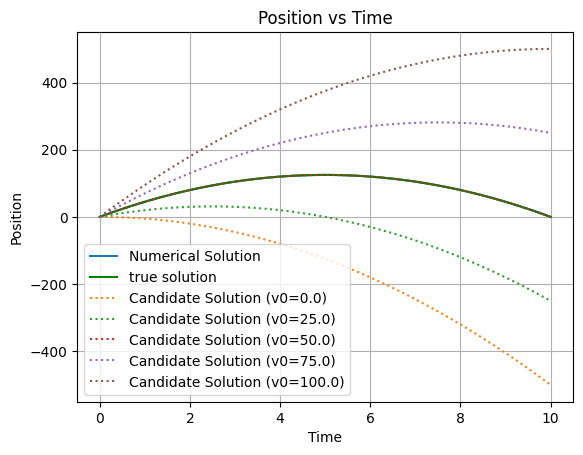

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode(t, y, g):
    x, v = y
    dxdt = v
    dvdt = -g
    return [dxdt, dvdt]

def f(v0):
    initial_condition = np.array([0, v0])  # Convert to NumPy array
    t_span = [0, 10]
    g = 10

    sol = solve_ivp(lambda t, y: ode(t, y, g), t_span, initial_condition, t_eval=[t_span[1]])
    return sol.y[0, 0]

# Define the range of v0 to search for the root
v0_min =0
v0_max = 100
num_candidates = 5
v0_candidates = np.linspace(v0_min, v0_max, num_candidates)

# Find the best candidate solution using numpy.argmin
candidate_values = [f(v0_candidate) for v0_candidate in v0_candidates]
best_candidate_index = np.argmin(np.abs(candidate_values))
best_candidate_v0 = v0_candidates[best_candidate_index]

print("Best candidate solution:", best_candidate_v0)

# Plotting code
initial_condition = np.array([0, best_candidate_v0])
t_span = [0, 10]
g = 10

sol = solve_ivp(lambda t, y: ode(t, y, g), t_span, initial_condition, t_eval=np.linspace(t_span[0], t_span[1], 100))
t_values = sol.t
y_values = sol.y[0]

plt.plot(t_values, y_values, label='Numerical Solution')

#True solution
def true_sol(t):
  g=10
  return 50*t-(g*t**2/2)
t_eval=np.linspace(t_span[0], t_span[1], 100)
x_true = true_sol(t_eval)
plt.plot(t_eval, x_true, label = "true solution", color = 'g')


# Plot candidate solutions
for v0_candidate in v0_candidates:
    initial_condition_candidate = np.array([0, v0_candidate])
    sol_candidate = solve_ivp(lambda t, y: ode(t, y, g), t_span, initial_condition_candidate, t_eval=np.linspace(t_span[0], t_span[1], 100))
    y_values_candidate = sol_candidate.y[0]
    plt.plot(t_values, y_values_candidate, linestyle=':', label=f'Candidate Solution (v0={v0_candidate})')


plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()
plt.grid(True)
plt.show()
